# Initialize required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import pylab as pl
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LinearLocator, FormatStrFormatter,MaxNLocator
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc




# Upload MU3.csv file for training model

In [2]:
from google.colab import files
files.upload()

Saving MU3.csv to MU3.csv


{'MU3.csv': b'CR_IoT,class,snr_dB,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25,e26,e27,e28,e29,e30,e31,e32,e33,e34,e35,e36,e37,e38,e39,e40,e41,e42,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52,e53,e54,e55,e56,e57,e58,e59,e60,e61,e62,e63,e64,e65,e66,e67,e68,e69,e70,e71,e72,e73,e74,e75,e76,e77,e78,e79,e80,e81,e82,e83,e84,e85,e86,e87,e88,e89,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99,e100,e101,e102,e103,e104,e105,e106,e107,e108,e109,e110,e111,e112,e113,e114,e115,e116,e117,e118,e119,e120,e121,e122,e123,e124,e125,e126,e127,e128,e129,e130,e131,e132,e133,e134,e135,e136,e137,e138,e139,e140,e141,e142,e143,e144,e145,e146,e147,e148,e149,e150,e151,e152,e153,e154,e155,e156,e157,e158,e159,e160,e161,e162,e163,e164,e165,e166,e167,e168,e169,e170,e171,e172,e173,e174,e175,e176,e177,e178,e179,e180,e181,e182,e183,e184,e185,e186,e187,e188,e189,e190,e191,e192,e193,e194,e195,e196,e197,e198,e199,e200,e201,e202,e203,e204,e205,e206,e207,e208,e209,e210,e211,e212,e213,e214,e215

# Read MU3.csv files

In [3]:
df=pd.read_csv('MU3.csv')
energy=df.iloc[:,3:]
emean=energy.mean(axis=1)
X=df.iloc[:,0:1]
X['energy']=emean
y_train=df.iloc[:,1]
feature_names=['CR-IoT users','energy level']

# Train model

In [4]:
model = SVC(kernel='linear')
clf = model.fit(X, y_train)
y_train_pred=model.predict(X)
model

SVC(kernel='linear')

# Upload test data

In [5]:
from google.colab import files
files.upload()

Saving test_data.csv to test_data.csv


{'test_data.csv': b'CR_IoT,class,snr_dB,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25,e26,e27,e28,e29,e30,e31,e32,e33,e34,e35,e36,e37,e38,e39,e40,e41,e42,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52,e53,e54,e55,e56,e57,e58,e59,e60,e61,e62,e63,e64,e65,e66,e67,e68,e69,e70,e71,e72,e73,e74,e75,e76,e77,e78,e79,e80,e81,e82,e83,e84,e85,e86,e87,e88,e89,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99,e100,e101,e102,e103,e104,e105,e106,e107,e108,e109,e110,e111,e112,e113,e114,e115,e116,e117,e118,e119,e120,e121,e122,e123,e124,e125,e126,e127,e128,e129,e130,e131,e132,e133,e134,e135,e136,e137,e138,e139,e140,e141,e142,e143,e144,e145,e146,e147,e148,e149,e150,e151,e152,e153,e154,e155,e156,e157,e158,e159,e160,e161,e162,e163,e164,e165,e166,e167,e168,e169,e170,e171,e172,e173,e174,e175,e176,e177,e178,e179,e180,e181,e182,e183,e184,e185,e186,e187,e188,e189,e190,e191,e192,e193,e194,e195,e196,e197,e198,e199,e200,e201,e202,e203,e204,e205,e206,e207,e208,e209,e210,e211,e212,e213,e21

# Read test_data.csv

In [6]:
df=pd.read_csv('test_data.csv')
energy=df.iloc[:,3:]
emean=energy.mean(axis=1)
X=df.iloc[:,0:1]
X['energy']=emean
y_test=df.iloc[:,1]
feature_names=['CR-IoT users','energy level']

# Predict test_data

In [7]:
predictions = model.predict(X)
y_test_pred=[]
for i in predictions:
  if i==0:
    y_test_pred.append(1)
  else:
    y_test_pred.append(-1)

#Y=np.reshape(Y,(1,60))


# Print precision, recall, and f1-score

In [8]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

          -1       1.00      0.94      0.97        17
           1       0.98      1.00      0.99        43

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



# COnfusion Matrix

In [9]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    cm=cm/cm.astype(np.float).sum(axis=1)
    np.set_printoptions(precision=2)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Automatically created module for IPython interactive environment


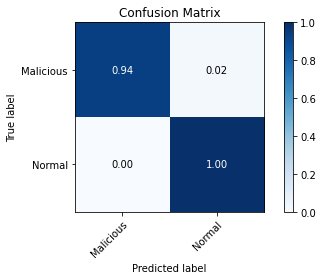

In [10]:


classLabels = ['Malicious', 'Normal']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=classLabels)
plt.show()

# Area Under Curve (AUC) function

In [11]:
def AUC(y_true,y_pred):
  FN=0
  TN=0
  tpr=[]
  fpr=[]
  tp=0;
  fp=0
  for i in y_true:
    if i==1:
      FN=FN+1
    else:
      TN=TN+1

  #print(FN,TN)
  for k in range(0,len(y_true)):
    i=y_true[k]
    j=y_pred[k]
    #print(i,j)
    if i==1 and j==1:
      FN=FN-1
      tp=tp+1
    elif i ==-1 and j==1:
      TN=TN-1
      fp=fp+1
    #print(FN,TN)
    tpr.append(tp/(tp+FN))
    fpr.append(fp/(fp+TN))
  
  tpr.append(1)
  fpr.append(1)
  return tpr,fpr
  

In [12]:
y_normal=np.ones(60)

# Display AUC with ROC

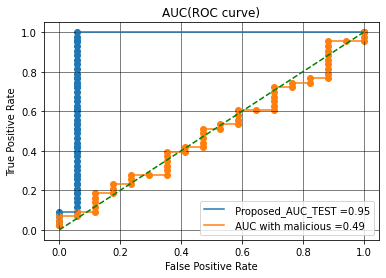

In [13]:
tpr,fpr=AUC(y_test,y_test_pred)
plt.scatter(fpr, tpr)
ac=auc(fpr, tpr)
plt.plot(fpr,tpr,label=" Proposed_AUC_TEST ="+str("{0:.2f}".format(ac)))
tpr,fpr=AUC(y_test,y_normal)  
plt.scatter(fpr, tpr)
ac=auc(fpr, tpr)
plt.plot(fpr,tpr,label=" AUC with malicious ="+str("{0:.2f}".format(ac)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


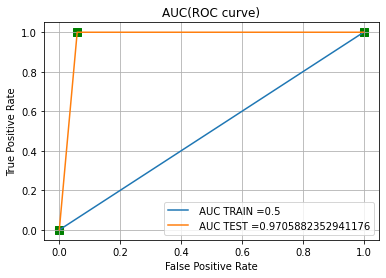

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_test, y_normal)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.scatter(train_fpr, train_tpr,marker='*',c='r',s=80)
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.scatter(test_fpr, test_tpr,marker='s',c='g',s=80)
#plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
#plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()